<a href="https://colab.research.google.com/github/AhmedAnasHaouari/SOMA_DATA/blob/main/Consult_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Consult stat:

- Haouari Ahmed Anas

- 05/07/2024

# Part 1 :

## Imports :

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import set_config
set_config(transform_output='pandas')

## Loading Data :

In [4]:
# 12 months file : From 23 June 2023 to 23 June 2024
excel_file = '/content/drive/MyDrive/Consultation 12 mois-converted.xlsx'
df = pd.read_excel(excel_file, index_col=False)
df.head(10)

,N° Dossie,Unnamed: 1,Unnamed: 2,N° Soins,Date Soins,Heure Soins Index,Unnamed: 6,Nom & prénom,Unnamed: 8,Unnamed: 9
0,1739/2022 (C),NaN,NaN,202389544,2023-06-23 00:00:00,07:47,202222678.0,BEN AMMAR NEJI,NaN,NaN
1,304/2023 (H),NaN,NaN,202389548,2023-06-23 00:00:00,07:48,20233849.0,MBAREK HANADI,NaN,NaN
2,1212/2019 (H),NaN,NaN,202389553,2023-06-23 00:00:00,07:49,201510311.0,MEKKI HELA,NaN,NaN
3,910/2023 (H),NaN,NaN,202389565,2023-06-23 00:00:00,07:53,202310038.0,CHEBIL AMEL,NaN,NaN
4,172/2023 (H),NaN,NaN,202389563,2023-06-23 00:00:00,07:53,20231995.0,KLAI YOUSSEF,NaN,NaN
5,1008/2022 (H),NaN,NaN,202389568,2023-06-23 00:00:00,07:56,202214753.0,MEDDEB NAIMA,NaN,NaN
6,1018/2023 (C),NaN,NaN,202389587,2023-06-23 00:00:00,08:10,202218662.0,AYARI SASSI,NaN,NaN
7,2069/2022 (H),NaN,NaN,202389598,2023-06-23 00:00:00,08:17,202226795.0,FRAIJIA SAMIRA,NaN,NaN
8,1503/2020 (H),NaN,NaN,202389648,2023-06-23 00:00:00,08:41,202015467.0,BEN MERIEM DALILA,NaN,NaN
9,1002/2022 (H),NaN,NaN,202389652,2023-06-23 00:00:00,08:44,202214672.0,DAAJI MANOUBIA,NaN,NaN


In [5]:
copy = df.copy()

# Cleaning Data :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N° Dossie             11432 non-null  object 
 1   Unnamed: 1            60 non-null     object 
 2   Unnamed: 2            0 non-null      float64
 3   N° Soins              11708 non-null  object 
 4   Date Soins            11708 non-null  object 
 5   Heure Soins    Index  11708 non-null  object 
 6   Unnamed: 6            11349 non-null  float64
 7   Nom & prénom          11708 non-null  object 
 8   Unnamed: 8            0 non-null      float64
 9   Unnamed: 9            1 non-null      float64
dtypes: float64(4), object(6)
memory usage: 916.5+ KB


In [7]:
df.duplicated().sum()

376

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# Dropping inconsistant columns and rows :
df.drop(columns=['Unnamed: 1',	'Unnamed: 2', 'Unnamed: 8',	'Unnamed: 9', 'Heure Soins    Index'], inplace=True)
df.dropna(subset=(['Unnamed: 6']), inplace=True)
df

,N° Dossie,N° Soins,Date Soins,Unnamed: 6,Nom & prénom
0,1739/2022 (C),202389544,2023-06-23 00:00:00,202222678.0,BEN AMMAR NEJI
1,304/2023 (H),202389548,2023-06-23 00:00:00,20233849.0,MBAREK HANADI
2,1212/2019 (H),202389553,2023-06-23 00:00:00,201510311.0,MEKKI HELA
3,910/2023 (H),202389565,2023-06-23 00:00:00,202310038.0,CHEBIL AMEL
4,172/2023 (H),202389563,2023-06-23 00:00:00,20231995.0,KLAI YOUSSEF
...,...,...,...,...,...
11722,344/2022 (H),202499375,2024-06-20 00:00:00,20221037.0,AKROUT NAOUFIL
11723,1130/2020 (H),2024100014,2024-06-21 00:00:00,201612783.0,HARBAOUI LAMIA
11724,877/2020 (H),2024100017,2024-06-21 00:00:00,20209250.0,FERCHICHI FODHA
11725,1096/2023 (H),2024100240,2024-06-22 00:00:00,202312348.0,GROURI KHALED


In [10]:
df.isna().sum()
# 296 rows have no Folder ID and have to be verified with the index :

N° Dossie       296
N° Soins          0
Date Soins        0
Unnamed: 6        0
Nom & prénom      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11349 entries, 0 to 11726
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N° Dossie     11053 non-null  object 
 1   N° Soins      11349 non-null  object 
 2   Date Soins    11349 non-null  object 
 3   Unnamed: 6    11349 non-null  float64
 4   Nom & prénom  11349 non-null  object 
dtypes: float64(1), object(4)
memory usage: 790.0+ KB


In [12]:
# Making the 'Date Soins' column as the index :
df['Date Soins'] = pd.to_datetime(df['Date Soins'], errors='coerce')
df.set_index('Date Soins', inplace=True)
print(df)

                 N° Dossie    N° Soins   Unnamed: 6      Nom & prénom
Date Soins                                                           
2023-06-23  1739/2022  (C)   202389544  202222678.0    BEN AMMAR NEJI
2023-06-23   304/2023  (H)   202389548   20233849.0     MBAREK HANADI
2023-06-23  1212/2019  (H)   202389553  201510311.0        MEKKI HELA
2023-06-23   910/2023  (H)   202389565  202310038.0       CHEBIL AMEL
2023-06-23   172/2023  (H)   202389563   20231995.0      KLAI YOUSSEF
...                    ...         ...          ...               ...
2024-06-20   344/2022  (H)   202499375   20221037.0    AKROUT NAOUFIL
2024-06-21  1130/2020  (H)  2024100014  201612783.0    HARBAOUI LAMIA
2024-06-21   877/2020  (H)  2024100017   20209250.0   FERCHICHI FODHA
2024-06-22  1096/2023  (H)  2024100240  202312348.0     GROURI KHALED
2024-06-22   743/2024  (H)  2024100264   20248029.0  CHAMROUKHI NIZAR

[11349 rows x 4 columns]


In [13]:
df.rename(columns={'Unnamed: 6': 'ID Patient'}, inplace=True)

In [14]:
# Converting variable types :
df['ID Patient'] = df['ID Patient'].astype(int)
df['N° Soins'] = df['N° Soins'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11349 entries, 2023-06-23 to 2024-06-22
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   N° Dossie     11053 non-null  object
 1   N° Soins      11349 non-null  int64 
 2   ID Patient    11349 non-null  int64 
 3   Nom & prénom  11349 non-null  object
dtypes: int64(2), object(2)
memory usage: 443.3+ KB


In [16]:
# Splitting N Dossier into two columns : 'Année' and 'Num Dossier'
df[['Num Dossier', 'Année']] = df['N° Dossie'].str.extract(r'(\d+)/(\d{4})')
df['Année'] = df['Année'].astype(int, errors='ignore')
df = df.drop(columns=['N° Dossie'])

In [17]:
df

,N° Soins,ID Patient,Nom & prénom,Num Dossier,Année
Date Soins,,,,,
2023-06-23,202389544,202222678,BEN AMMAR NEJI,1739,2022
2023-06-23,202389548,20233849,MBAREK HANADI,304,2023
2023-06-23,202389553,201510311,MEKKI HELA,1212,2019
2023-06-23,202389565,202310038,CHEBIL AMEL,910,2023
2023-06-23,202389563,20231995,KLAI YOUSSEF,172,2023
...,...,...,...,...,...
2024-06-20,202499375,20221037,AKROUT NAOUFIL,344,2022
2024-06-21,2024100014,201612783,HARBAOUI LAMIA,1130,2020
2024-06-21,2024100017,20209250,FERCHICHI FODHA,877,2020


# Resampling :

In [18]:
# Creating a new dataframe with the number of consultation per day :
df_daily =  df.resample('D').size()
df_daily = df_daily.to_frame(name='Consultations Count')
df_daily

,Consultations Count
Date Soins,
2023-06-23,25
2023-06-24,0
2023-06-25,0
2023-06-26,39
2023-06-27,50
...,...
2024-06-18,28
2024-06-19,59
2024-06-20,41


# Exploring stats :

In [19]:
# Number of total consultation and total of patients for the entire period :
for i in df.columns :
  number_of_unique_names = df[i].nunique()
  print(f"Nombre de valeur unique pour {i} : {number_of_unique_names}")

Nombre de valeur unique pour N° Soins : 11349
Nombre de valeur unique pour ID Patient : 4189
Nombre de valeur unique pour Nom & prénom : 4127
Nombre de valeur unique pour Num Dossier : 1981
Nombre de valeur unique pour Année : 17


Over a year there are :
- 11349 consultations.
- 4189 different patients.  

In [20]:
# Number of patients by year of first consultation :
df['Année'].value_counts().sort_index()

Année
0201       2
2004       2
2006       2
2011      13
2012      36
2013      49
2014     117
2015     164
2016     239
2017     493
2018     664
2019     899
2020    1048
2021    1227
2022    2122
2023    2990
2024     979
Name: count, dtype: int64

# Data Visualization :

In [28]:
df_weekday.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Monday', 'Tuesday',
       ...
       'Wednesday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date Soins', length=208)

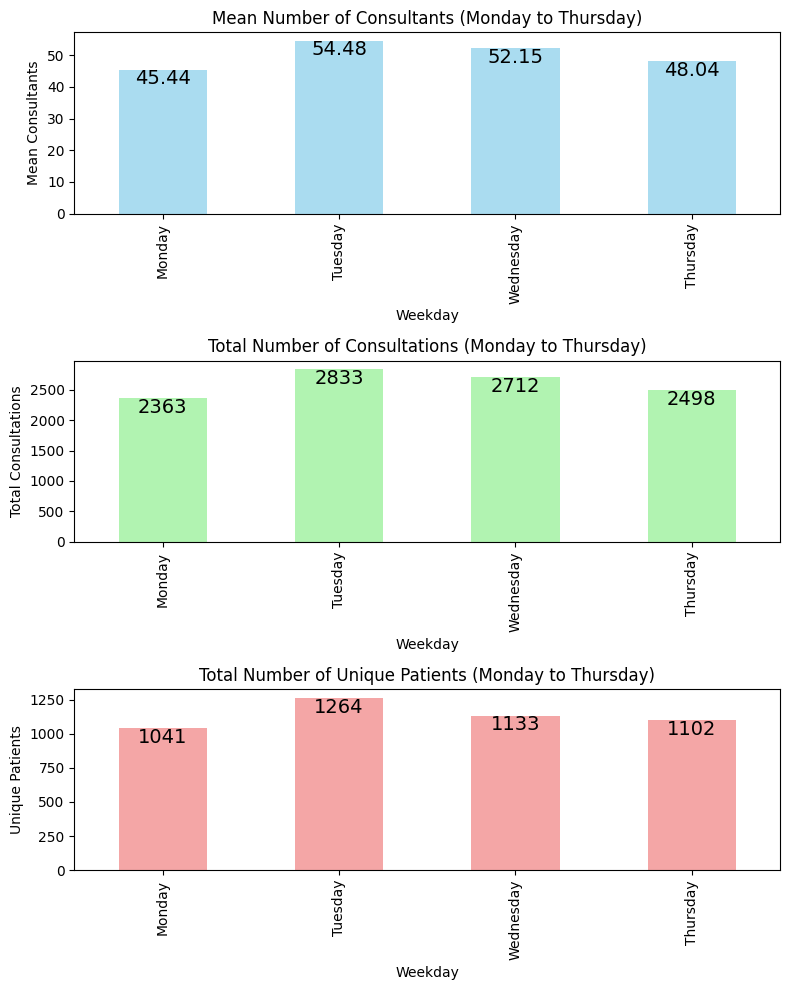

In [31]:
import matplotlib.pyplot as plt

# Filter the data for weekdays (Monday to Thursday)
df_weekdays = df[df.index.dayofweek < 4]
df_weekday = df_daily[df_daily.index.dayofweek < 4]

# Calculate mean number of consultants and total consultations for each weekday
mean_consultants = df_weekday.groupby(df_weekday.index.day_name())['Consultations Count'].mean()
total_consultations = df_weekdays.groupby(df_weekdays.index.day_name())['N° Soins'].count()
unique_patients = df_weekdays.groupby(df_weekdays.index.day_name())['ID Patient'].nunique()

# Ensure the data is sorted by weekday
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

# Reorder mean_consultants, total_consultations, and unique_patients based on weekdays_order
mean_consultants = mean_consultants.reindex(weekdays_order)
total_consultations = total_consultations.reindex(weekdays_order)
unique_patients = unique_patients.reindex(weekdays_order)

# Plotting
plt.figure(figsize=(8, 10))

# Plot mean number of consultants
plt.subplot(3, 1, 1)
bars = mean_consultants.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Mean Number of Consultants (Monday to Thursday)')
plt.xlabel('Weekday')
plt.ylabel('Mean Consultants')

# Adding annotations
for i, v in enumerate(mean_consultants):
    plt.text(i, v + 0.2, '{:.2f}'.format(v), color='black', va='top', ha='center', fontsize=14)

# Plot total number of consultations
plt.subplot(3, 1, 2)
bars = total_consultations.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Total Number of Consultations (Monday to Thursday)')
plt.xlabel('Weekday')
plt.ylabel('Total Consultations')

# Adding annotations
for i, v in enumerate(total_consultations):
    plt.text(i, v + 0.2, str(v), color='black', va='top', ha='center', fontsize=14)

# Plot total number of unique patients
plt.subplot(3, 1, 3)
bars = unique_patients.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Total Number of Unique Patients (Monday to Thursday)')
plt.xlabel('Weekday')
plt.ylabel('Unique Patients')

# Adding annotations
for i, v in enumerate(unique_patients):
    plt.text(i, v + 0.2, str(v), color='black', ha='center', va='top', fontsize=14)

plt.tight_layout()
plt.show()


# Data by month :

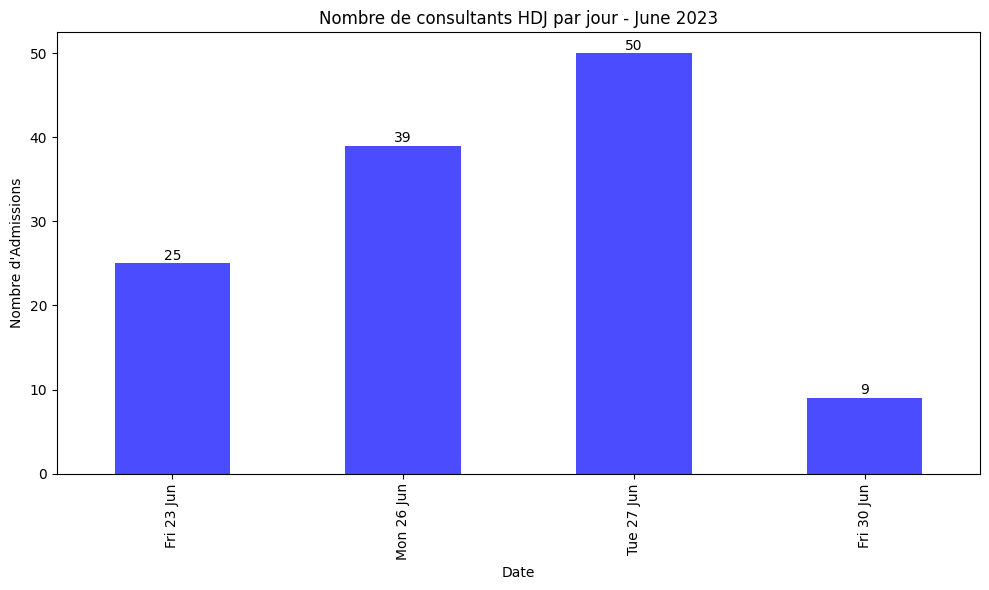

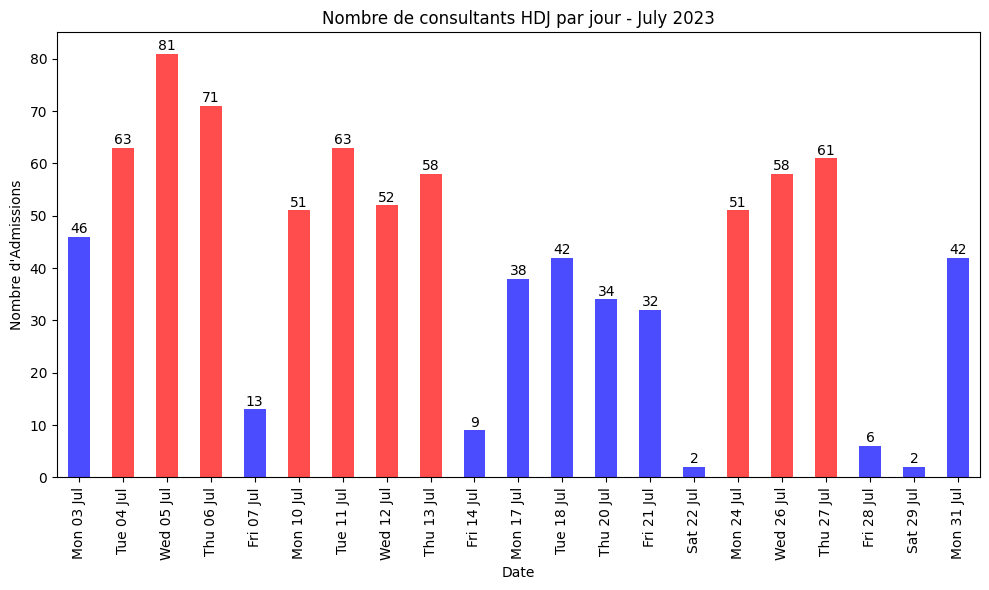

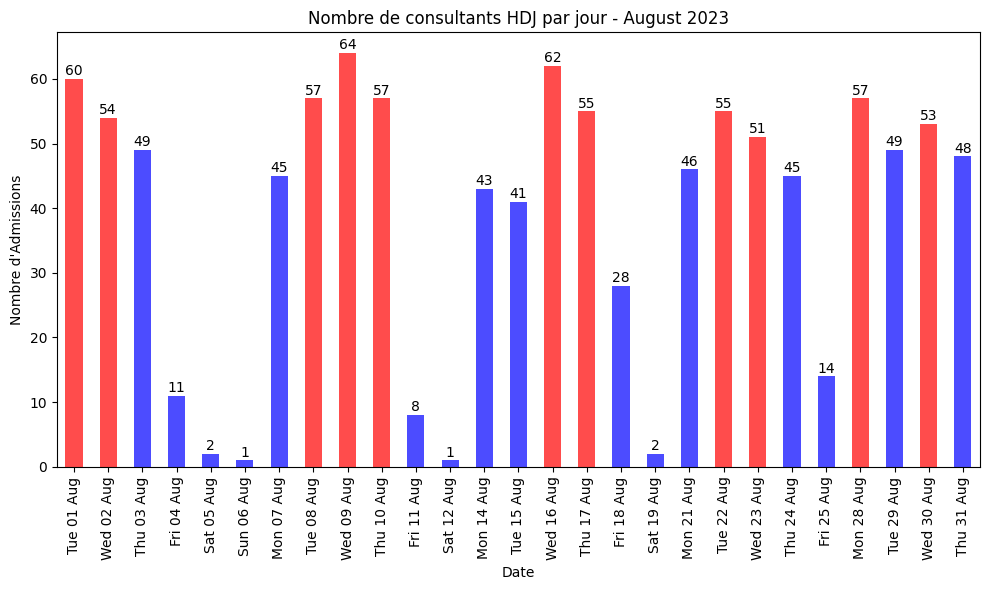

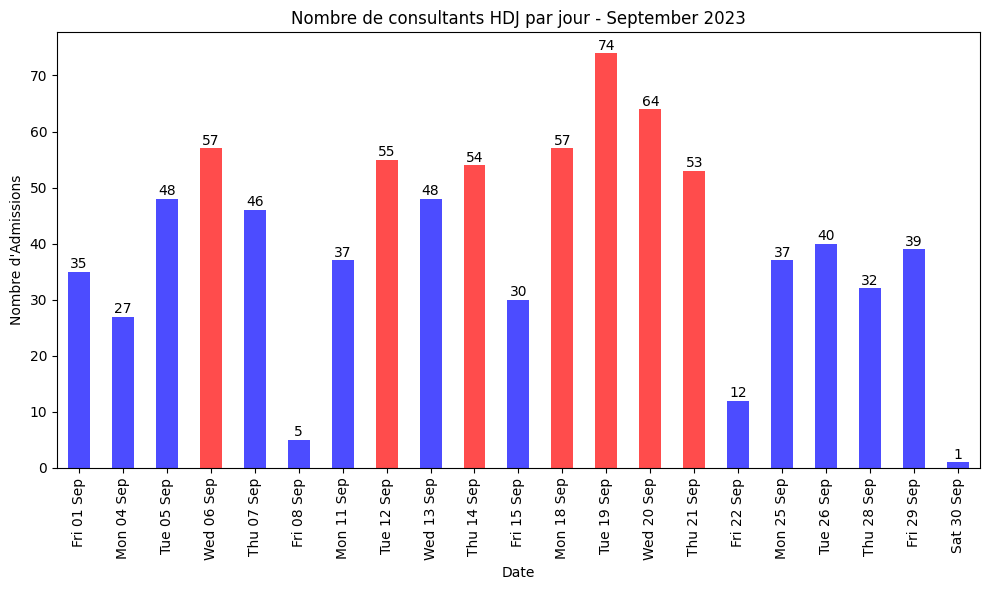

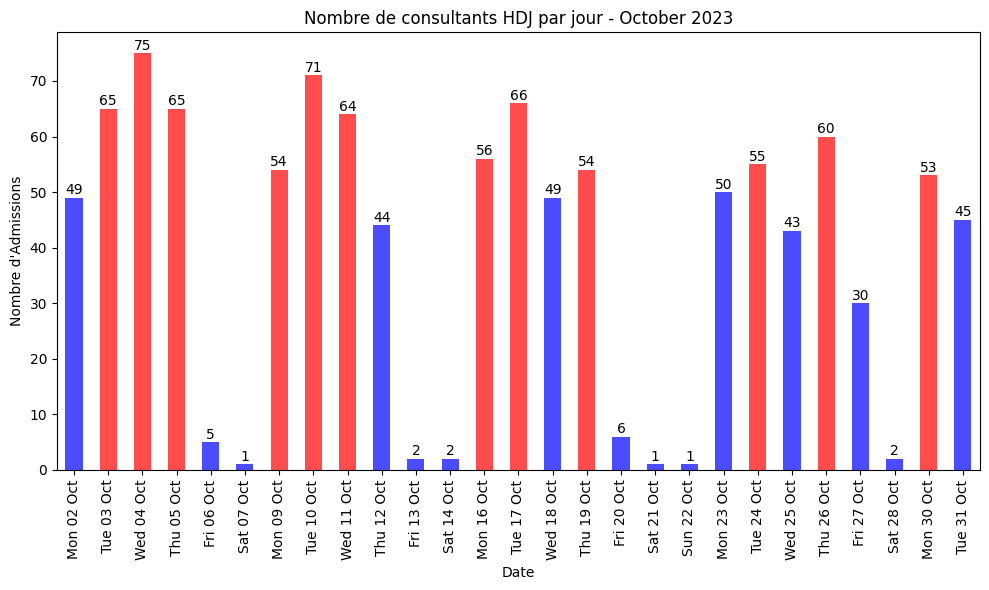

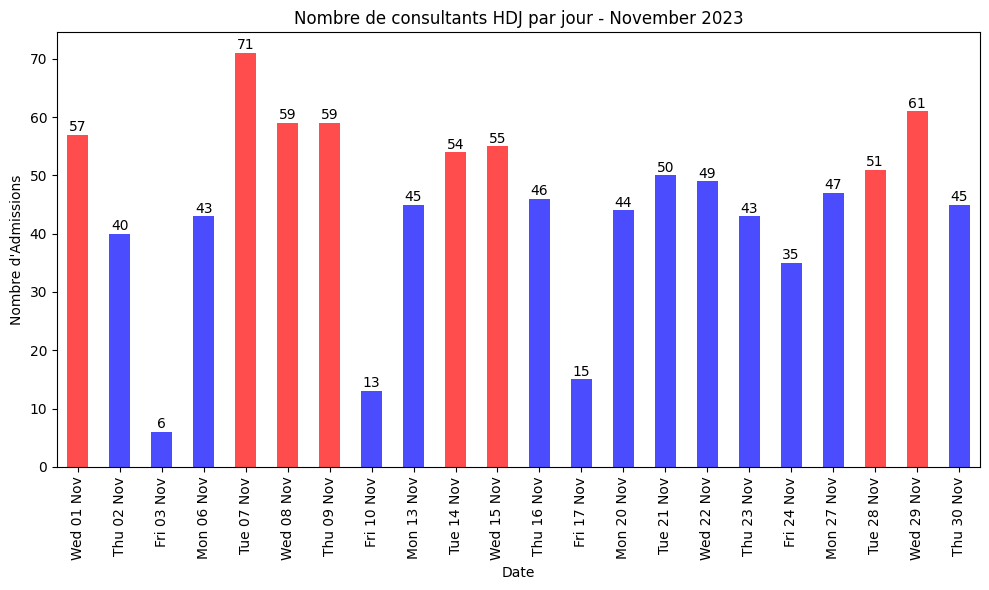

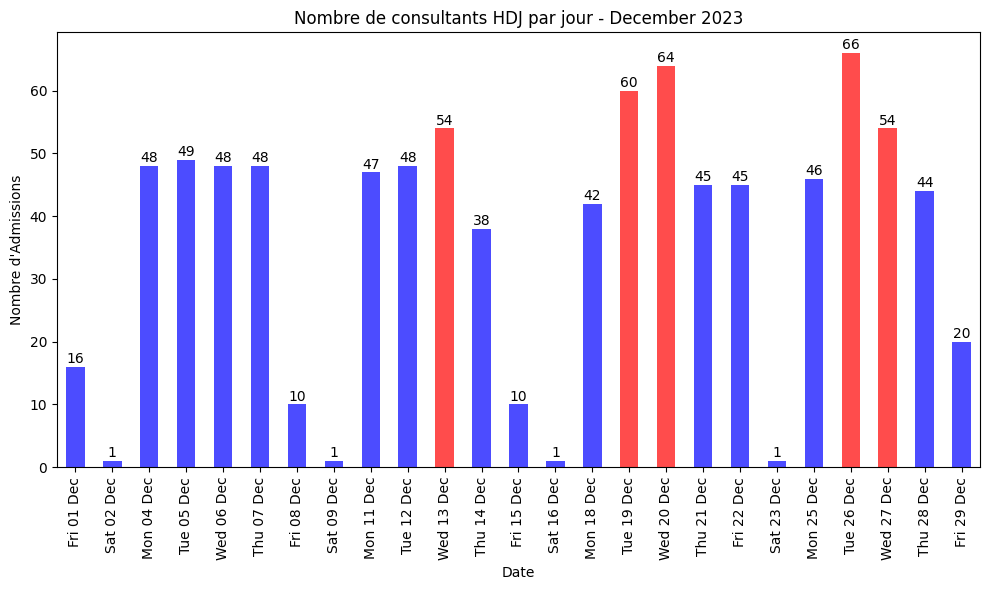

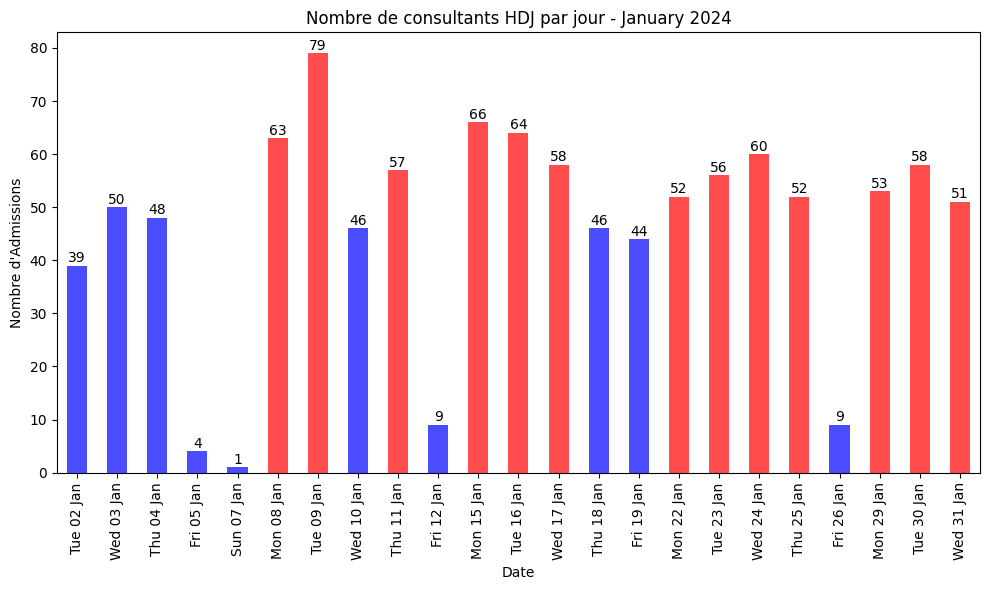

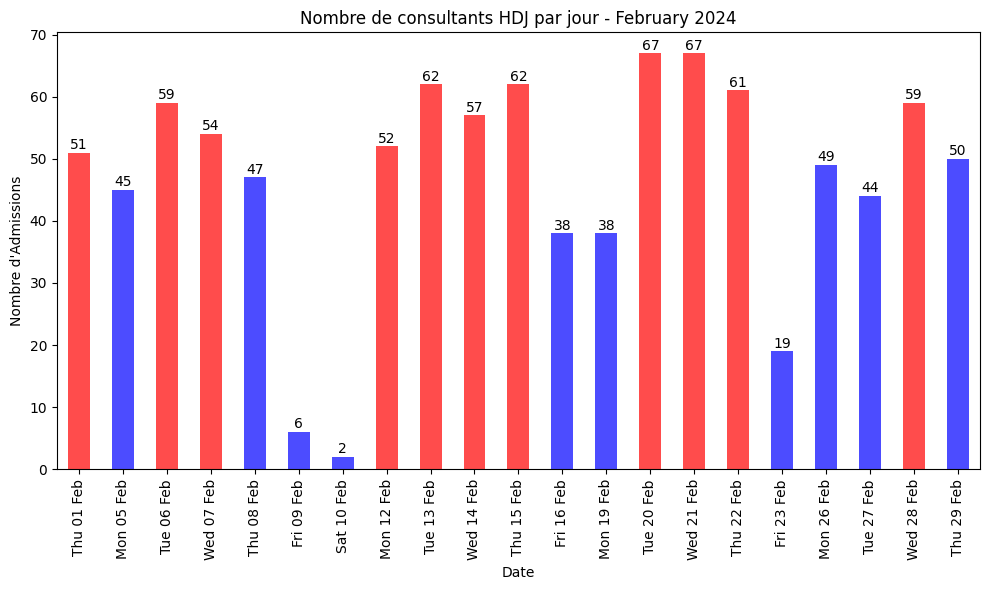

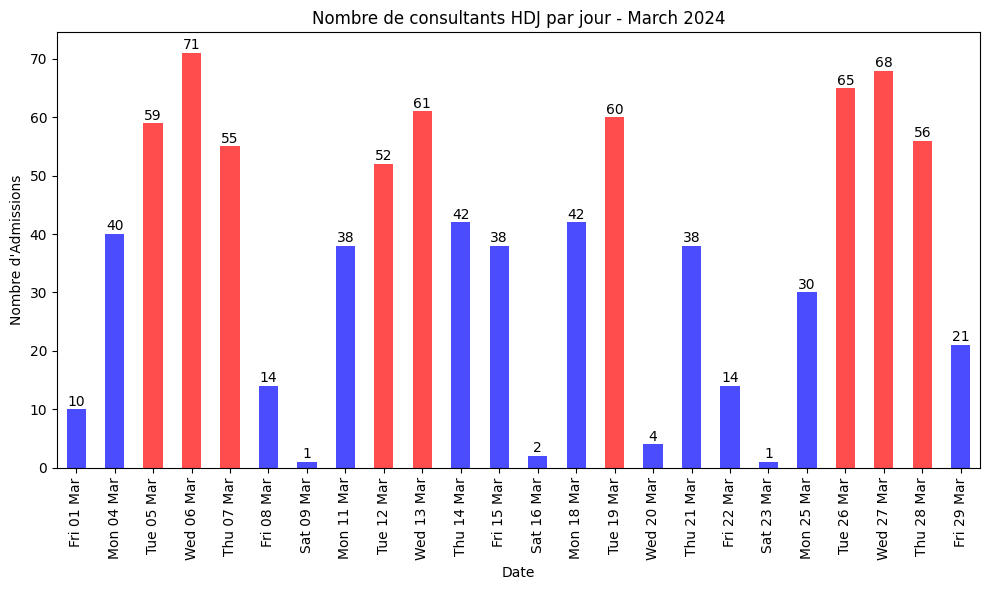

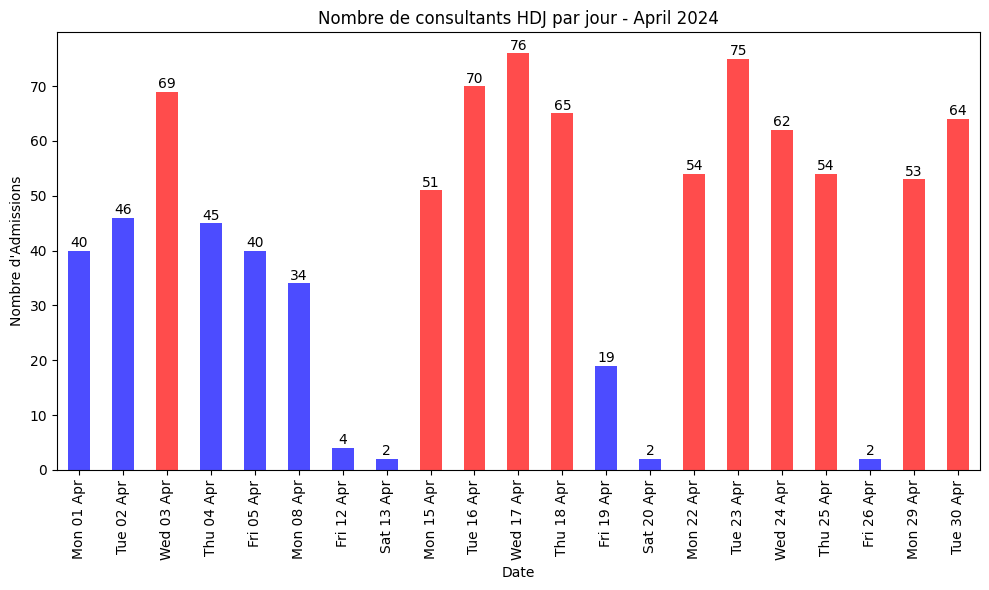

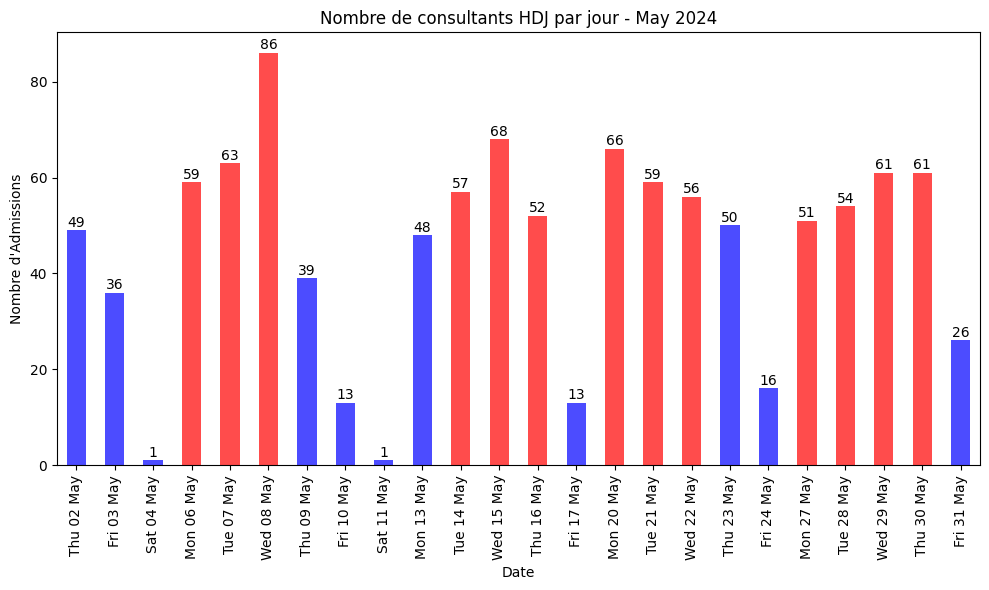

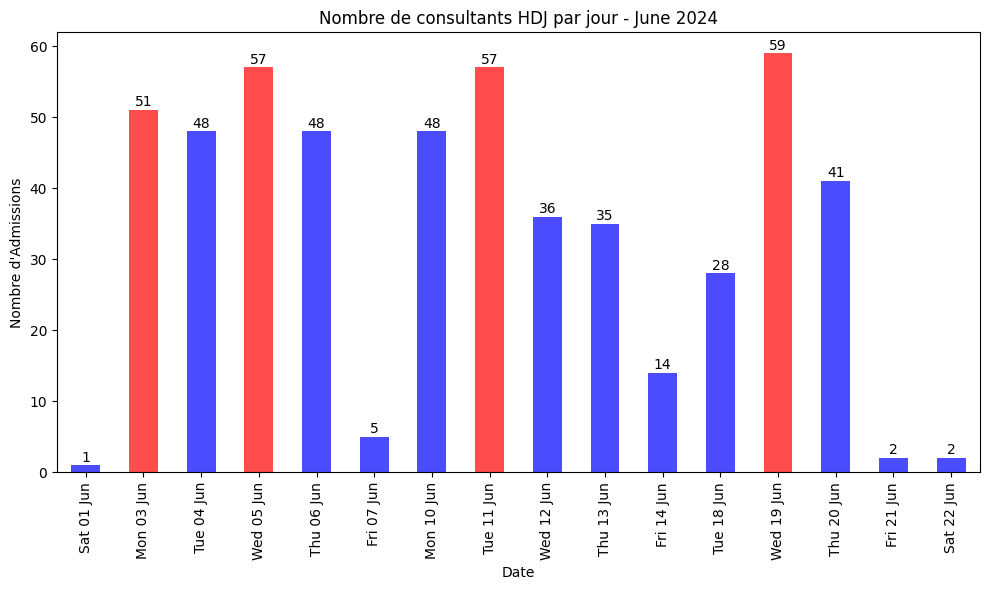

In [30]:
# Splitting DataFrame into different DataFrames for each month
dfs = {}
for month, group in df.groupby(pd.Grouper(freq='M')):
    dfs[month] = group

# Plotting each month's data
for month, df_month in dfs.items():
    plt.figure(figsize=(10, 6))

    # Group by day and calculate admissions count
    admissions_by_day = df_month.groupby(df_month.index.day).size()

    colors = ['red' if x > 50 else 'blue' for x in admissions_by_day]
    admissions_by_day.plot(kind='bar', color=colors, alpha=0.7)

    plt.title(f'Nombre de consultants par jour - {month.strftime("%B %Y")}')
    plt.xlabel('Date')
    plt.ylabel("Nombre d'Admissions")

    plt.xticks(rotation=90)
    date_labels = df_month.index.strftime('%a %d %b').unique()
    plt.gca().set_xticklabels(date_labels)

    for i, v in enumerate(admissions_by_day):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Verifying missing Num Dossier :

In [23]:
#for i in result_df.columns :
#  number_of_unique_names = result_df[i].nunique()
#  print(f"Nombre de valeur unique pour {i} : {number_of_unique_names}")

In [24]:
#endex_counts = df.groupby('Index')['Nom & prénom'].nunique().reset_index()
#multiple_names_index = index_counts[index_counts['Nom & prénom'] > 1]
#multiple_names_index

In [25]:
#result_df = pd.merge(multiple_names_index, df.drop_duplicates('Index'), on='Index', how='left')[['Index', 'Nom & prénom']]
#print("Indexes with more than one Nom & prénom:")
#print(result_df)

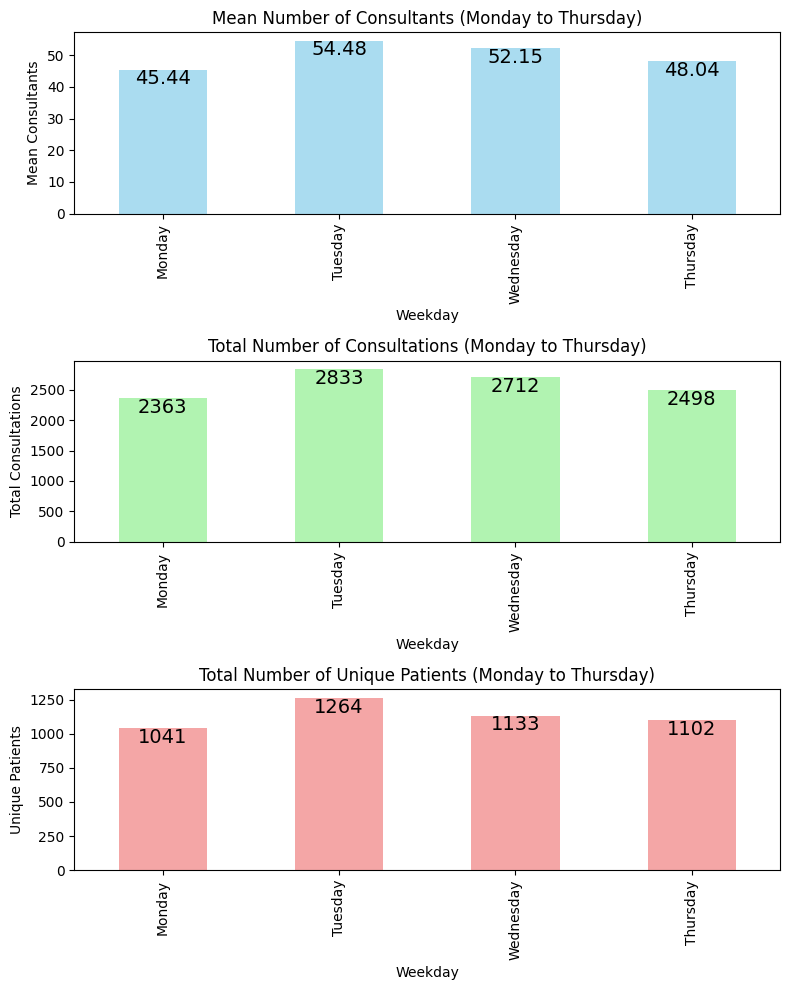

In [29]:
import matplotlib.pyplot as plt

# Ensure the data is sorted by weekday
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

# Reorder mean_consultants, total_consultations, and unique_patients based on weekdays_order
mean_consultants = mean_consultants.reindex(weekdays_order)
total_consultations = total_consultations.reindex(weekdays_order)
unique_patients = unique_patients.reindex(weekdays_order)

# Plotting
plt.figure(figsize=(8, 10))

# Plot mean number of consultants
plt.subplot(3, 1, 1)
bars = mean_consultants.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Mean Number of Consultants (Monday to Thursday)')
plt.xlabel('Weekday')
plt.ylabel('Mean Consultants')

# Adding annotations
for i, v in enumerate(mean_consultants):
    plt.text(i, v + 0.2, '{:.2f}'.format(v), color='black', va='top', ha='center', fontsize=14)

# Plot total number of consultations
plt.subplot(3, 1, 2)
bars = total_consultations.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Total Number of Consultations (Monday to Thursday)')
plt.xlabel('Weekday')
plt.ylabel('Total Consultations')

# Adding annotations
for i, v in enumerate(total_consultations):
    plt.text(i, v + 0.2, str(v), color='black', va='top', ha='center', fontsize=14)

# Plot total number of unique patients
plt.subplot(3, 1, 3)
bars = unique_patients.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Total Number of Unique Patients (Monday to Thursday)')
plt.xlabel('Weekday')
plt.ylabel('Unique Patients')

# Adding annotations
for i, v in enumerate(unique_patients):
    plt.text(i, v + 0.2, str(v), color='black', ha='center', va='top', fontsize=14)

plt.tight_layout()
plt.show()
